# Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

*I answered Q0 and Q3*

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

## Answers to Q0
1. Regression is predicting a numeric outcome while classification is predicting a categorical outcome
2. A confusion table is a quantity of interest for categorical data - a cross-tabulation of predicted and actual values. It helps us understand whether the model's accuracy in prediction against the real values. 
3. SSE or Sum of Squared Error is a measure of how far the model's predicted values are from the true values - basically model accuracy. 
4. Overfittign occurs when model is too complex to reliably explain the phenomena you are interested in. Underfitting is when the model is too simple to reliably explain the phenomenon of interest.
5. Splitting the data allows you to have some hold out data for testing model performance by creating a sample of data the model has never seen. This means, performance on the hold-out data will mimic future performance, as long as data generating process is similar. Substituting uncertainty about future predictions for uncertainty about hold-out data.
6. The strengths of class label prediction are its simplicity, efficiency, and clarity while the weaknesses are lack of confidence information, no ambiguity insight, and possibility for misinterpretation. The strengths of teh Probability Distribution Prediction are the confidence levels for each class and ambiguity insight which allows for better decision-making. The weakensses are being more complex and computationally intensive. 

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

## Answers to Q3

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn

# %pip install scikit-learn

In [3]:
df = pd.read_csv('https://github.com/alaplace17/knn/blob/main/data/cars_env.csv?raw=true')
df.head()

,veh id,manufacturer,nameplate,model,CVCM class,EPA class,fleet type,fuel type,footprint,baseline price,baseline mpg,baseline sales,predicted mpg
0,1,HONDA,Acura,MDX 4WD,11,SUV,T,G,50.8,45706.20000,22.052700,57380.0,23.011100
1,2,HONDA,Acura,RDX,11,SUV,T,G,45.1,34588.20000,24.174500,21271.0,26.457747
2,3,HONDA,Acura,RL,4,MIDSIZE CARS,C,G,47.6,47934.90000,24.562900,5132.0,23.773800
3,4,HONDA,Acura,TL,4,MIDSIZE CARS,C,G,47.8,35217.81622,27.068237,56720.0,26.884192
4,5,HONDA,Acura,TSX,3,COMPACT CARS,C,G,46.0,29483.10000,29.855173,21996.0,31.871653


### EDA

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.

In [4]:
df.describe()

,veh id,CVCM class,footprint,baseline price,baseline mpg,baseline sales,predicted mpg
count,524.000000,524.000000,524.000000,5.240000e+02,524.000000,524.000000,524.000000
mean,262.500000,11.020992,49.427847,5.165181e+04,24.676600,24764.820399,25.579073
std,151.410039,5.828454,7.915366,8.968875e+04,6.432016,41233.978890,6.700769
min,1.000000,1.000000,36.692097,1.178304e+04,12.000000,1.000000,12.022800
25%,131.750000,5.000000,44.200000,2.521127e+04,20.209807,2163.500000,20.791995
50%,262.500000,11.000000,47.262519,3.253602e+04,23.782704,10157.000000,24.632950
75%,393.250000,17.000000,52.598319,5.098088e+04,27.713313,27427.250000,28.766287
max,524.000000,19.000000,77.500000,1.734000e+06,65.777800,335544.000000,70.844200


In [5]:
print(df['footprint'].describe(), '\n')
print(df['baseline mpg'].describe(), '\n')
print(df['baseline price'].describe(), '\n')
print(df['baseline sales'].describe(), '\n')

count    524.000000
mean      49.427847
std        7.915366
min       36.692097
25%       44.200000
50%       47.262519
75%       52.598319
max       77.500000
Name: footprint, dtype: float64 

count    524.000000
mean      24.676600
std        6.432016
min       12.000000
25%       20.209807
50%       23.782704
75%       27.713313
max       65.777800
Name: baseline mpg, dtype: float64 

count    5.240000e+02
mean     5.165181e+04
std      8.968875e+04
min      1.178304e+04
25%      2.521127e+04
50%      3.253602e+04
75%      5.098088e+04
max      1.734000e+06
Name: baseline price, dtype: float64 

count       524.000000
mean      24764.820399
std       41233.978890
min           1.000000
25%        2163.500000
50%       10157.000000
75%       27427.250000
max      335544.000000
Name: baseline sales, dtype: float64 



In [6]:
df.rename(columns={'baseline mpg': 'mpg'}, inplace=True)
df.rename(columns={'baseline price': 'price'}, inplace=True)
df.rename(columns={'baseline sales': 'sales'}, inplace=True)
df.head()

,veh id,manufacturer,nameplate,model,CVCM class,EPA class,fleet type,fuel type,footprint,price,mpg,sales,predicted mpg
0,1,HONDA,Acura,MDX 4WD,11,SUV,T,G,50.8,45706.20000,22.052700,57380.0,23.011100
1,2,HONDA,Acura,RDX,11,SUV,T,G,45.1,34588.20000,24.174500,21271.0,26.457747
2,3,HONDA,Acura,RL,4,MIDSIZE CARS,C,G,47.6,47934.90000,24.562900,5132.0,23.773800
3,4,HONDA,Acura,TL,4,MIDSIZE CARS,C,G,47.8,35217.81622,27.068237,56720.0,26.884192
4,5,HONDA,Acura,TSX,3,COMPACT CARS,C,G,46.0,29483.10000,29.855173,21996.0,31.871653


<Axes: xlabel='footprint', ylabel='Density'>

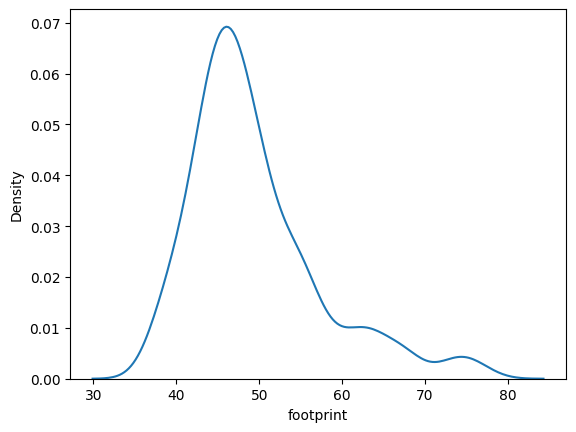

In [7]:
sns.kdeplot(data=df,x='footprint')

<Axes: xlabel='mpg', ylabel='Density'>

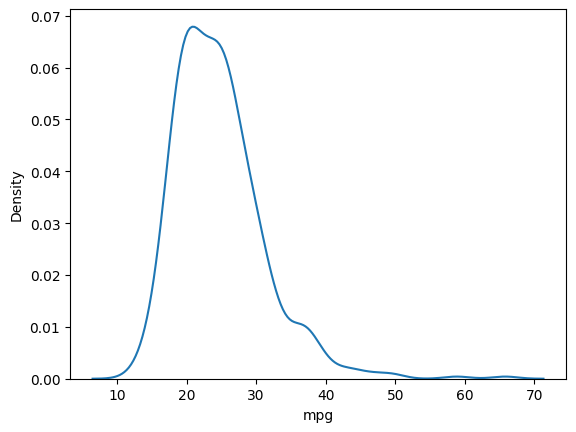

In [8]:
sns.kdeplot(data=df,x='mpg')

<Axes: xlabel='price', ylabel='Density'>

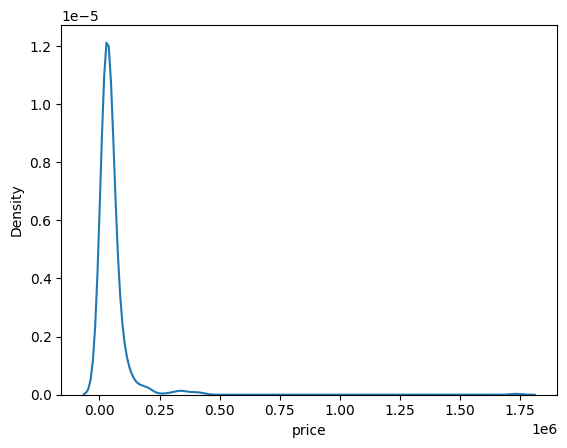

In [9]:
sns.kdeplot(data=df,x='price')

<Axes: xlabel='sales', ylabel='Density'>

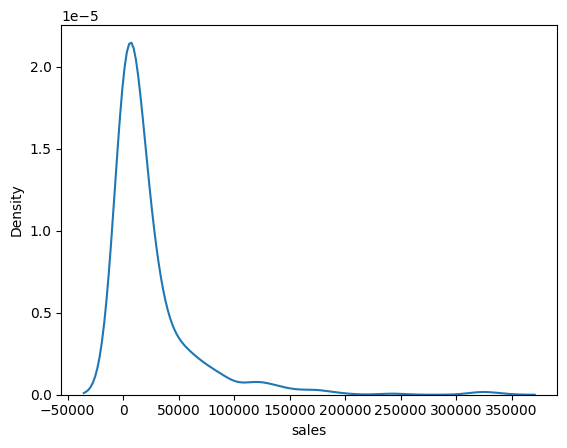

In [10]:
sns.kdeplot(data=df,x='sales')

<Axes: xlabel='footprint', ylabel='mpg'>

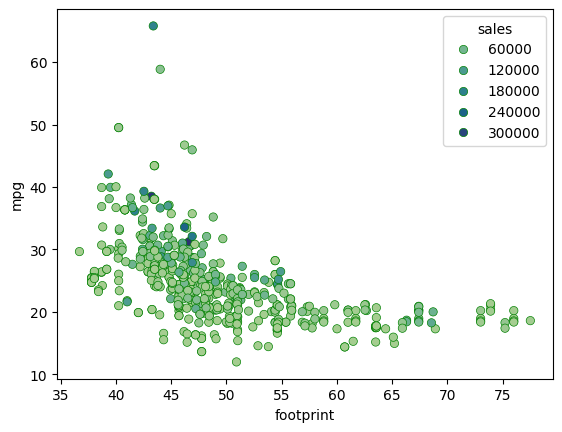

In [11]:
sns.scatterplot(data=df, x='footprint', y='mpg',
                hue='sales',
                palette='crest',edgecolor='green',)

C:\Users\alexl\AppData\Local\Temp\ipykernel_8484\3500587814.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='price', y='sales',


<Axes: xlabel='price', ylabel='sales'>

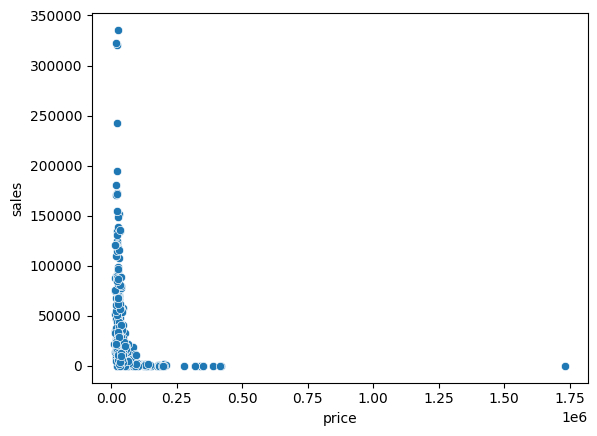

In [12]:
sns.scatterplot(data=df, x='price', y='sales',
                palette='crest')

<Axes: xlabel='mpg', ylabel='sales'>

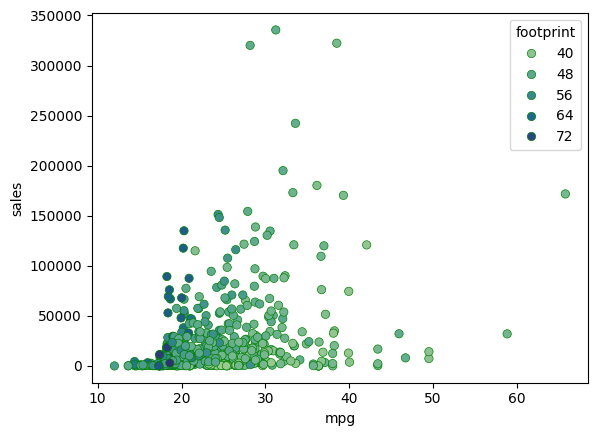

In [13]:
sns.scatterplot(data=df, x='mpg', y='sales',
                hue='footprint',
                palette='crest',edgecolor='green')

<Axes: xlabel='mpg', ylabel='price'>

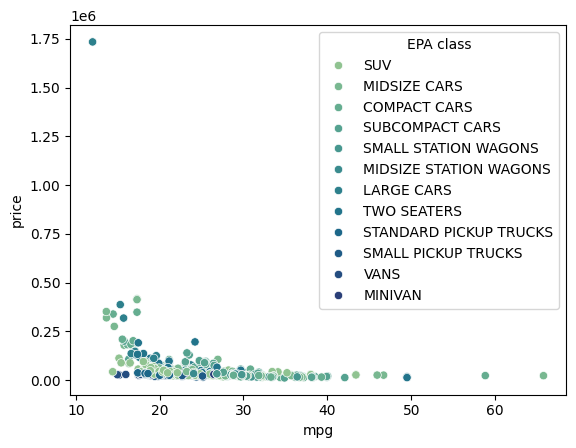

In [14]:
sns.scatterplot(data=df, x='mpg', y='price',
                hue='EPA class',
                palette='crest')

2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be `sales`. Does it make sense to normalize $y$?

In [15]:
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool

# Select features/target variable for analysis:
y = df['sales'] # Create target variable vector
X = df.loc[:,['footprint','mpg','price']] # Create feature matrix
print(X.head())
print(X.describe())

   footprint        mpg        price
0       50.8  22.052700  45706.20000
1       45.1  24.174500  34588.20000
2       47.6  24.562900  47934.90000
3       47.8  27.068237  35217.81622
4       46.0  29.855173  29483.10000
        footprint         mpg         price
count  524.000000  524.000000  5.240000e+02
mean    49.427847   24.676600  5.165181e+04
std      7.915366    6.432016  8.968875e+04
min     36.692097   12.000000  1.178304e+04
25%     44.200000   20.209807  2.521127e+04
50%     47.262519   23.782704  3.253602e+04
75%     52.598319   27.713313  5.098088e+04
max     77.500000   65.777800  1.734000e+06


In [16]:
# Maxmin normalization function; Sci-kit calls it the "standard scaler"
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   footprint       mpg     price
0   0.345715  0.186930  0.019697
1   0.206036  0.226385  0.013242
2   0.267299  0.233608  0.020991
3   0.272200  0.280194  0.013607
4   0.228091  0.332018  0.010277
        footprint         mpg       price
count  524.000000  524.000000  524.000000
mean     0.312090    0.235722    0.023150
std      0.193966    0.119604    0.052077
min      0.000000    0.000000    0.000000
25%      0.183982    0.152662    0.007797
50%      0.259029    0.219100    0.012050
75%      0.389783    0.292190    0.022760
max      1.000000    1.000000    1.000000


*You don't normalize y because we don't look at any distances related to y in fitting or using the model*

3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 

In [17]:
# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.3, # Split the sample 70 train/ 30 test
                                                    random_state=65) # For replication purposes

4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.

In [18]:
sse_dict = {}

k_bar = 150 # Number of k's to try
SSE = [] # We'll store the SSE here 
SSE_on_train = [] # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
sse_dict["Model 1"] = SSE_min
print("Varaible selection #1")
print("-"*50)
print(X.columns.tolist())
print(f"SSE min: {SSE_min:.3f}")
print('The best k value is ' + str(k_star[0]))

Varaible selection #1
--------------------------------------------------
['footprint', 'mpg', 'price']
SSE min: 194707562008.892
The best k value is 6


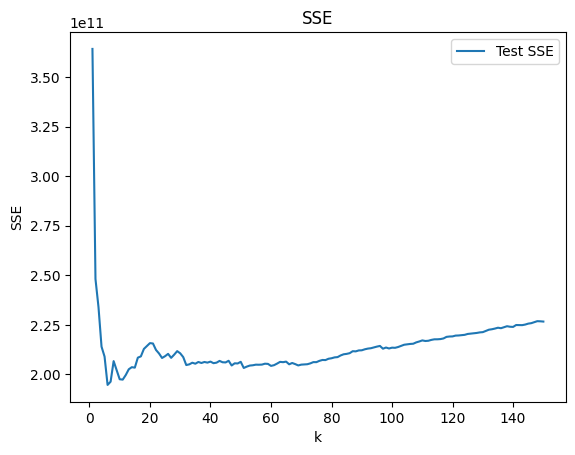

In [19]:
plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.

*For `footprint` and `mpg`*

In [20]:
# Select features/target variable for analysis:
y = df['sales'] # Create target variable vector
X = df.loc[:,['footprint','mpg']] # Create feature matrix
print(X.head())
print(X.describe())

   footprint        mpg
0       50.8  22.052700
1       45.1  24.174500
2       47.6  24.562900
3       47.8  27.068237
4       46.0  29.855173
        footprint         mpg
count  524.000000  524.000000
mean    49.427847   24.676600
std      7.915366    6.432016
min     36.692097   12.000000
25%     44.200000   20.209807
50%     47.262519   23.782704
75%     52.598319   27.713313
max     77.500000   65.777800


In [21]:
# Maxmin normalization function; Sci-kit calls it the "standard scaler"
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   footprint       mpg
0   0.345715  0.186930
1   0.206036  0.226385
2   0.267299  0.233608
3   0.272200  0.280194
4   0.228091  0.332018
        footprint         mpg
count  524.000000  524.000000
mean     0.312090    0.235722
std      0.193966    0.119604
min      0.000000    0.000000
25%      0.183982    0.152662
50%      0.259029    0.219100
75%      0.389783    0.292190
max      1.000000    1.000000


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.3, # Split the sample 70 train/ 30 test
                                                    random_state=65) # For replication purposes

In [23]:
k_bar = 150 # Number of k's to try
SSE = [] # We'll store the SSE here 
SSE_on_train = [] # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
sse_dict["Model 2"] = SSE_min
print("Varaible selection #2")
print("-"*50)
print(X.columns.tolist())
print(f"SSE min: {SSE_min:.3f}")
print('The best k value is ' + str(k_star[0]))

Varaible selection #2
--------------------------------------------------
['footprint', 'mpg']
SSE min: 197596782553.251
The best k value is 10


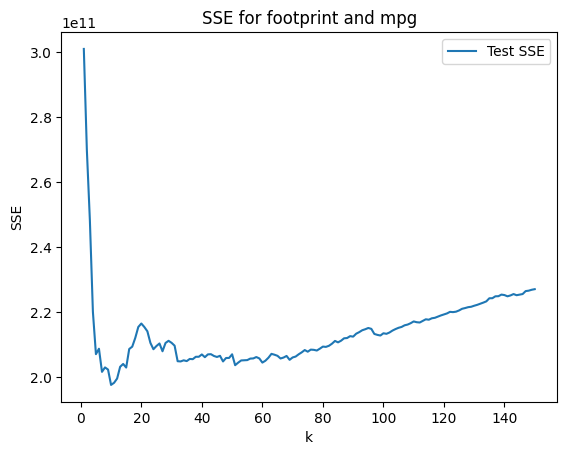

In [24]:
plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE for footprint and mpg')
plt.show()

*For `footprint` and `price`*

In [25]:
# Select features/target variable for analysis:
y = df['sales'] # Create target variable vector
X = df.loc[:,['footprint','price']] # Create feature matrix
print(X.head())
print(X.describe())

   footprint        price
0       50.8  45706.20000
1       45.1  34588.20000
2       47.6  47934.90000
3       47.8  35217.81622
4       46.0  29483.10000
        footprint         price
count  524.000000  5.240000e+02
mean    49.427847  5.165181e+04
std      7.915366  8.968875e+04
min     36.692097  1.178304e+04
25%     44.200000  2.521127e+04
50%     47.262519  3.253602e+04
75%     52.598319  5.098088e+04
max     77.500000  1.734000e+06


In [26]:
# Maxmin normalization function; Sci-kit calls it the "standard scaler"
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   footprint     price
0   0.345715  0.019697
1   0.206036  0.013242
2   0.267299  0.020991
3   0.272200  0.013607
4   0.228091  0.010277
        footprint       price
count  524.000000  524.000000
mean     0.312090    0.023150
std      0.193966    0.052077
min      0.000000    0.000000
25%      0.183982    0.007797
50%      0.259029    0.012050
75%      0.389783    0.022760
max      1.000000    1.000000


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.3, # Split the sample 70 train/ 30 test
                                                    random_state=65) # For replication purposes

In [28]:
k_bar = 150 # Number of k's to try
SSE = [] # We'll store the SSE here 
SSE_on_train = [] # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
sse_dict["Model 3"] = SSE_min
print("Varaible selection #3")
print("-"*50)
print(X.columns.tolist())
print(f"SSE min: {SSE_min:.3f}")
print('The best k value is ' + str(k_star[0]))

Varaible selection #3
--------------------------------------------------
['footprint', 'price']
SSE min: 211937066449.700
The best k value is 12


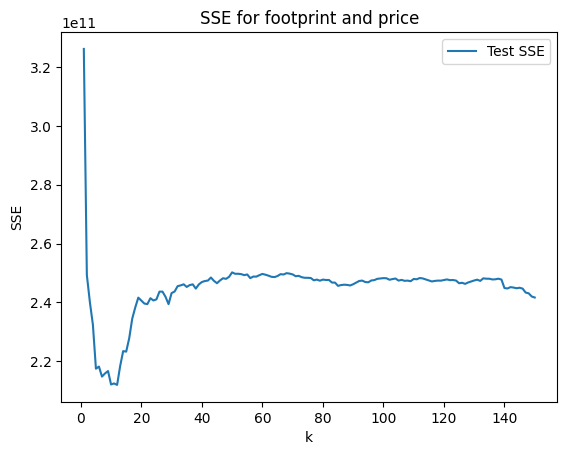

In [29]:
plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE for footprint and price')
plt.show()

*For `mpg` and `price`*

In [30]:
# Select features/target variable for analysis:
y = df['sales'] # Create target variable vector
X = df.loc[:,['mpg','price']] # Create feature matrix
print(X.head())
print(X.describe())

         mpg        price
0  22.052700  45706.20000
1  24.174500  34588.20000
2  24.562900  47934.90000
3  27.068237  35217.81622
4  29.855173  29483.10000
              mpg         price
count  524.000000  5.240000e+02
mean    24.676600  5.165181e+04
std      6.432016  8.968875e+04
min     12.000000  1.178304e+04
25%     20.209807  2.521127e+04
50%     23.782704  3.253602e+04
75%     27.713313  5.098088e+04
max     65.777800  1.734000e+06


In [31]:
# Maxmin normalization function; Sci-kit calls it the "standard scaler"
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

        mpg     price
0  0.186930  0.019697
1  0.226385  0.013242
2  0.233608  0.020991
3  0.280194  0.013607
4  0.332018  0.010277
              mpg       price
count  524.000000  524.000000
mean     0.235722    0.023150
std      0.119604    0.052077
min      0.000000    0.000000
25%      0.152662    0.007797
50%      0.219100    0.012050
75%      0.292190    0.022760
max      1.000000    1.000000


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.3, # Split the sample 70 train/ 30 test
                                                    random_state=65) # For replication purposes

In [33]:
k_bar = 150 # Number of k's to try
SSE = [] # We'll store the SSE here 
SSE_on_train = [] # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
sse_dict["Model 4"] = SSE_min
print("Varaible selection #4")
print("-"*50)
print(X.columns.tolist())
print(f"SSE min: {SSE_min:.3f}")
print('The best k value is ' + str(k_star[0]))

Varaible selection #4
--------------------------------------------------
['mpg', 'price']
SSE min: 205143947045.737
The best k value is 39


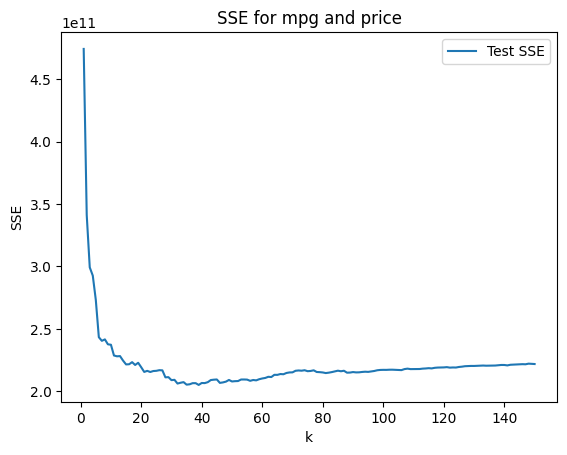

In [34]:
plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE for mpg and price')
plt.show()

In [ ]:
print(sse_dict)
sse_values = sse_dict.values()
min(sse_values)

{'Model 1': np.float64(194707562008.89246), 'Model 2': np.float64(197596782553.25146), 'Model 3': np.float64(211937066449.70004), 'Model 4': np.float64(205143947045.73657)}


np.float64(194707562008.89246)

6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Model 1 has the lowest SSE at K Nearest Neighbords of 6 meaning it does the best at its optimal choice of neighbors of 6**

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.